# Find equilibrium point

In [ ]:
from math import cos
import scipy.optimize

# theta = 0.3, n = 4, mu = 1

def hill(x):
  return 1/(1+pow((x/0.3),4))

def fun(x):
  temp_x = (1/1)*hill(x[0])
  temp_y = (1/1)*hill(x[1])
  return [1*x[0]-hill(temp_x),1*x[1]-hill(temp_y)]

In [ ]:
# x solution
x0 = scipy.optimize.fsolve(fun,[0, 0])
print(x0)

[0.00803493 0.00803493]


# Test for one sdde

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def dW(delta_t):
    """Random sample normal distribution"""
    return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))

def f(X):
  return 1/(1+pow((X/0.3),3))

In [ ]:
tau = 2
t0 = 0
t1=100
N      = 10000 # Compute 1000 grid points
dt     = float(t1 - t0) / N
t = np.linspace(t0,t1,N)
M = round(tau/dt)
num_sims = 10

mu=1
n=3
theta=0.3
b=0.01
sig1=0.1
sig2=0.1

xs = np.empty(N)
ys = np.empty(N)

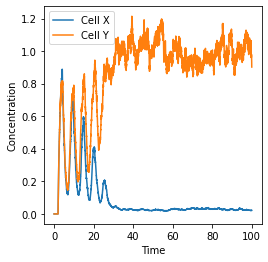

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)


#for _ in range(num_sims):
for i in range(N):
  if i<=M+1:
      ys[i]=0  # initial condition
      xs[i]=0  # initial condition
  else: 
      xs[i] = xs[i-1] + (-mu*xs[i-1]+ (1-b)*f(ys[i-1-M]))*dt + sig1*xs[i-1]*dW(dt) + 0.5* sig1**2 * xs[i-1]* (dW(dt)**2 - dt)
      ys[i] = ys[i-1] + (-mu*ys[i-1] + f(xs[i-1-M]))* dt + sig2*ys[i-1]*dW(dt) + 0.5* sig2**2 * ys[i-1]* (dW(dt)**2 - dt)
plt.plot(t, xs, label="Cell X")
plt.plot(t, ys,label="Cell Y")
plt.legend()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

# Plot
plt.xlabel("Time")
h = plt.ylabel("Concentration")
plt.show()

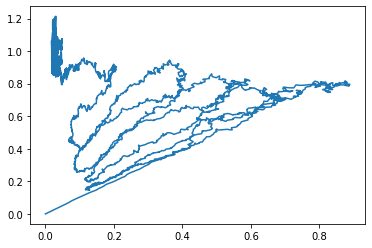

In [ ]:
plt.plot(xs,ys)

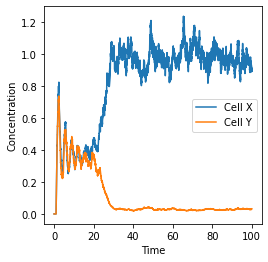

In [ ]:
tau = 1
t0 = 0
t1=100
N      = 10000 # Compute 1000 grid points
dt     = float(t1 - t0) / N
t = np.linspace(t0,t1,N)
M = round(tau/dt)
num_sims = 10

mu=1
n=3
theta=0.3
b=0.01
sig1=0.1
sig2=0.1

xs = np.empty(N)
ys = np.empty(N)
fig = plt.figure()
ax = fig.add_subplot(111)


#for _ in range(num_sims):
for i in range(N):
  if i<=M+1:
      ys[i]=0  # initial condition
      xs[i]=0  # initial condition
  else: 
      xs[i] = xs[i-1] + (-mu*xs[i-1]+ (1-b)*f(ys[i-1-M]))*dt + sig1*xs[i-1]*dW(dt) + 0.5* sig1**2 * xs[i-1]* (dW(dt)**2 - dt)
      ys[i] = ys[i-1] + (-mu*ys[i-1] + f(xs[i-1-M]))* dt + sig2*ys[i-1]*dW(dt) + 0.5* sig2**2 * ys[i-1]* (dW(dt)**2 - dt)
plt.plot(t, xs, label="Cell X")
plt.plot(t, ys,label="Cell Y")
plt.legend()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

# Plot
plt.xlabel("Time")
h = plt.ylabel("Concentration")
plt.show()

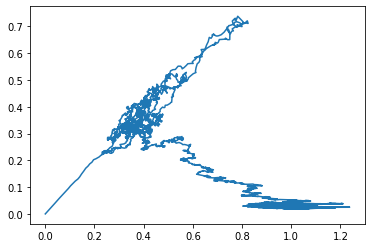

In [ ]:
plt.plot(xs,ys)

In [ ]:
xs[-1]
ys[-1]

0.03163601605770159

Can see graphically that the equilibrium point is around (0,1.2) or (1.2,0)

# Functions (DRAFT)

In [ ]:
def switching_range(xs):
  for i in range(len(xs)):
    if (abs(xs[i]-1.2)<=0.2):
      switching_place = xs[i]
      ith = i
      break
  return [switching_place,ith]

In [ ]:
def x_y_switch(xs):
  if (xs[-1]>1): # if the last y is greater than 1 (should be around 1.2)
    x_switch=True
    return [switching_range(xs),x_switch] # then calculate the difference between the x point)
  else:
    x_switch=False
    return [switching_range(ys),x_switch] # else, then calculate difference between y point

In [ ]:
def switching_time(xs):
  return 0.01*xs[0][1]

In [ ]:
def switching_point(temp):
  if temp[1]==True:
    return xs[-1]
  else:
    return ys[-1]

In [ ]:
def all_switching(xs,ys):
  temp = x_y_switch(xs)
  time = switching_time(temp)
  y = switching_point(temp)

# Functions - class of switching functions (DRAFT 2)

In [ ]:
class switching(object):
  #global switching_place
  def __init__(self):
        pass

  # Function to test if point is close to equilibrium point
  def place(xs,ys):
    for i in range(len(xs)):
      diff = ys[i]-xs[i]
      if (abs(diff-1.2)<=0.05):
        return [xs[i],ys[i],i]  # returns place of switch, and ith index       

  # Function to test end point of switch and switch place
  def x_switch(xs):
    if (xs[-1]>1): # if the last x is greater than 1 (should be around 1.2)
      return True # true that its an x switch
    else:
      return False # else, then calculate difference between y point

  # Function to find the corresponding switching time
  def time(place_output):
    return 0.01*place_output[2]
  
  # Function to find switching point
  def point(temp):
    if temp==True:
      return xs[-1]
    else:
      return ys[-1]

  def plotting(t,xs,ys):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    plt.plot(t, xs, label="Cell X")
    plt.plot(t, ys,label="Cell Y")
    plt.axhline(y = y, color = "green", label = "Switching point") # Plotting a single vertical line
    plt.axvline(x=time,label='Switching time')
    # plt.legend()
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')


In [ ]:
# Function to test if switch is an x_switch
def x_switch(xs):
  if (xs[-1]>1):
    return True 
  else:
    return False

# Function to test if switching point
def point(xs,ys):
  for i in range(len(xs)):
    diff = ys[i]-xs[i]
    if (abs(diff-1.2)<=0.2):
      print("Switching point: ", xs[i],', ',ys[i])
      print("Index of switching point: ", i)
      print("Switching time: ", 0.01*i)

      return [xs[i],ys[i],i,0.01*i]  # returns place of switch, and ith index       

# Function to find the corresponding switching time for switching point
def time(pt):
  return 0.01*pt[2]

# Function to find switching point
def point(temp):
  if temp==True:
    return xs[-1]
  else:
    return ys[-1]

def plotting(t,xs,ys):
  fig = plt.figure()
  ax = fig.add_subplot(111)

  plt.plot(t, xs, label="Cell X")
  plt.plot(t, ys,label="Cell Y")
  plt.axhline(y = y, color = "green", label = "Switching point") # Plotting a single vertical line
  plt.axvline(x=time,label='Switching time')
  # plt.legend()
  ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

In [ ]:
def point(xs,ys):
  for i in range(len(xs)):
    diff = abs(ys[i]-xs[i])
    if (abs(diff-1.2)<=0.2):
      print("Switching point: ", xs[i],', ',ys[i])
      print("Index of switching point: ", i)
      print("Switching time: ", 0.01*i)
      return [xs[i],ys[i],i,0.01*i]  # returns place of switch, and ith index       

def plotting(xs,ys,full_time,switch_time,y):
  fig = plt.figure()
  ax = fig.add_subplot(111)

  plt.plot(full_time, xs, label="Cell X")
  plt.plot(full_time, ys,label="Cell Y")
  plt.axhline(y = y, color = "green", label = "Switching point") # Plotting a single vertical line
  plt.axvline(x=switch_time,label='Switching time')
  # plt.legend()
  ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
  
switch_info= point(xs,ys)
print(switch_info)

Switching point:  1.050540677126055 ,  0.048769098130201465
Index of switching point:  2881
Switching time:  28.810000000000002
[1.050540677126055, 0.048769098130201465, 2881, 28.810000000000002]


In [ ]:
t0 = 0
t1=100
N      = 10000 # Compute 1000 grid points
dt     = float(t1 - t0) / N
t = np.linspace(t0,t1,N)
switch_info= point(xs,ys)

def switch_plot(xs,ys,t,switch_info):
  #fig = plt.figure()
  #ax = fig.add_subplot(111)
  
  plt.plot(t, xs, label="Cell X")
  plt.plot(t, ys,label="Cell Y")
  plt.axhline(y = switch_info[0], color = "green", label = "Switching point") # Plotting a single vertical line
  plt.axvline(x=switch_info[3],label='Switching time')
  plt.legend()
  #ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

Switching point:  1.050540677126055 ,  0.048769098130201465
Index of switching point:  2881
Switching time:  28.810000000000002


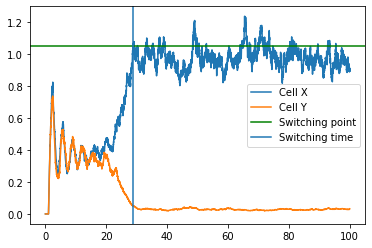

In [ ]:
switch_plot(xs,ys,t,switch_info)

# Example 1: τ = 2 IGNORE

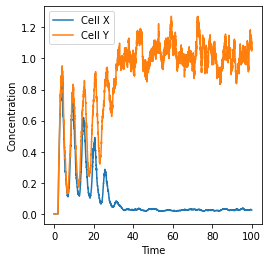

In [ ]:
tau = 2
t0 = 0
t1=100
N      = 10000 # Compute 1000 grid points
dt     = float(t1 - t0) / N
t = np.linspace(t0,t1,N)
M = round(tau/dt)
num_sims = 10

mu=1
n=3
theta=0.3
b=0.01
sig1=0.1
sig2=0.1

xs = np.empty(N)
ys = np.empty(N)
fig = plt.figure()
ax = fig.add_subplot(111)


#for _ in range(num_sims):
for i in range(N):
  if i<=M+1:
      ys[i]=0  # initial condition
      xs[i]=0  # initial condition
  else: 
      xs[i] = xs[i-1] + (-mu*xs[i-1]+ (1-b)*f(ys[i-1-M]))*dt + sig1*xs[i-1]*dW(dt) + 0.5* sig1**2 * xs[i-1]* (dW(dt)**2 - dt)
      ys[i] = ys[i-1] + (-mu*ys[i-1] + f(xs[i-1-M]))* dt + sig2*ys[i-1]*dW(dt) + 0.5* sig2**2 * ys[i-1]* (dW(dt)**2 - dt)
plt.plot(t, xs, label="Cell X")
plt.plot(t, ys,label="Cell Y")
plt.legend()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

# Plot
plt.xlabel("Time")
h = plt.ylabel("Concentration")
plt.show()

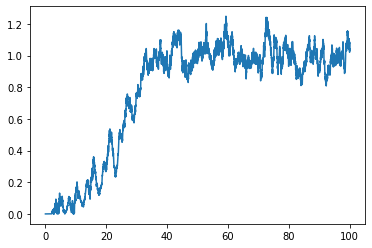

In [ ]:
plt.plot(t,abs(ys-xs))

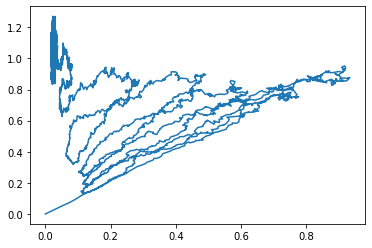

In [ ]:
plt.plot(xs,ys)

Switching point: ( 0.05139668210784298 ,  0.8615381070747002 )
Index of switching point:  3035
Switching time:  30.35


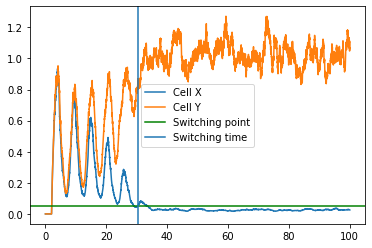

In [ ]:
switch_info = switching.info(xs,ys,dt)
switching.plot(xs,ys,t,switch_info)

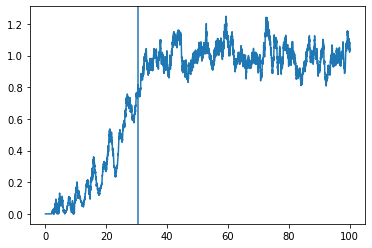

In [ ]:
plt.plot(t,abs(ys-xs))
plt.axvline(x=switch_info[3])

# Example 2: \tau=1 IGNORE

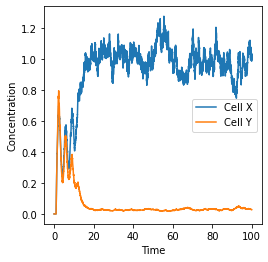

In [ ]:
tau = 1
t0 = 0
t1=100
N      = 10000 # Compute 1000 grid points
dt     = float(t1 - t0) / N
t = np.linspace(t0,t1,N)
M = round(tau/dt)
num_sims = 10

mu=1
n=3
theta=0.3
b=0.01
sig1=0.1
sig2=0.1

xs = np.empty(N)
ys = np.empty(N)
fig = plt.figure()
ax = fig.add_subplot(111)


#for _ in range(num_sims):
for i in range(N):
  if i<=M+1:
      ys[i]=0  # initial condition
      xs[i]=0  # initial condition
  else: 
      xs[i] = xs[i-1] + (-mu*xs[i-1]+ (1-b)*f(ys[i-1-M]))*dt + sig1*xs[i-1]*dW(dt) + 0.5* sig1**2 * xs[i-1]* (dW(dt)**2 - dt)
      ys[i] = ys[i-1] + (-mu*ys[i-1] + f(xs[i-1-M]))* dt + sig2*ys[i-1]*dW(dt) + 0.5* sig2**2 * ys[i-1]* (dW(dt)**2 - dt)
plt.plot(t, xs, label="Cell X")
plt.plot(t, ys,label="Cell Y")
plt.legend()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

# Plot
plt.xlabel("Time")
h = plt.ylabel("Concentration")
plt.show()

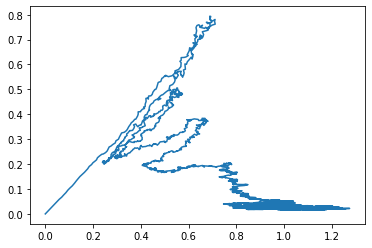

In [ ]:
plt.plot(xs,ys)

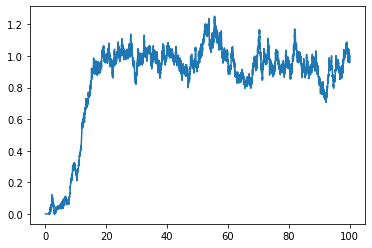

In [ ]:
plt.plot(t,abs(ys-xs))

Switching point: ( 1.199413572708823 ,  0.025957492338844344 )
Index of switching point:  5232
Switching time:  52.32


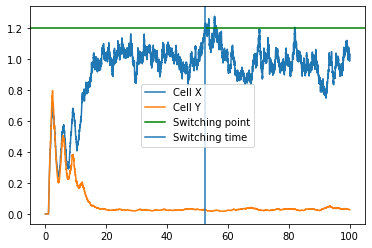

In [ ]:
switch_info = switching.info(xs,ys,dt)
switching.plot(xs,ys,t,switch_info)

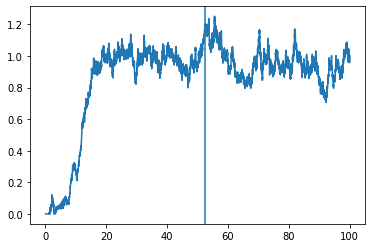

In [ ]:
plt.plot(t,abs(ys-xs))
plt.axvline(x=switch_info[3])

# (RUN) Switching Class

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def dW(delta_t):
    """Random sample normal distribution"""
    return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))

def f(X):
  return 1/(1+pow((X/0.3),3))

class switching(object):
  def __init__(self):
    pass

  def point(xs,ys):
    times = []
    for i in range(len(xs)):
      # If difference is bigger than one, save time rounded to 10
      if abs(ys[i]-xs[i])>=1:
        # print("xs[i]=,",xs[i],"i=",i,'time',dt*i)
        rounded = round(dt*i/10)*10
        times.append(rounded)
    
    # Make a dictionary to record occurences of rounded times
    result = dict((i, times.count(i)) for i in times)
    print(result)
    for key, value in result.items():
      # if number of times a time has been recorded is larger than 10, let this be the switch time.
      if value>=5:
        switch_time=key
        return switch_time

  def info(xs,ys,dt):
    for i in range(len(xs)):
      diff = abs(ys[i]-xs[i])
      if (diff >= 0.95): # eq point close to 1.2
        print("Switching point: (", xs[i],', ',ys[i],')')
        print("Index of switching point: ", i)
        print("Switching time: ", dt*i)
        return [xs[i],ys[i],i,dt*i]  # returns place of switch, and ith index
           

  def plot(xs,ys,t,switch_info,new_switch_time):
    fig = plt.figure(figsize=(6, 6))
    #ax = fig.add_subplot(111)

    plt.plot(t, xs, label="Cell X")
    plt.plot(t, ys,label="Cell Y")
    #plt.axhline(y = switch_info[0], color = "green", label = "Switching point")
    #plt.axhline(y=switch_info[1])
    #plt.axvline(x=switch_info[3],label='Switching time old')
    plt.axvline(x=new_switch_time,label='Switching point')
    plt.legend()
  
  def switch_type(xs,ys):
    if xs[-1]>=ys[-1]:
      return 'X'
    else:
      return 'Y'

# An example

In [ ]:
def example(tau,t0,t1,N,mu,theta,n,b,sigma):
  dt     = float(t1 - t0) / N
  t = np.linspace(t0,t1,N)
  M = round(tau/dt)
  num_sims = 10

  xs = np.empty(N)
  ys = np.empty(N)

  #for _ in range(num_sims):
  for i in range(N):
    if i<=M+1:
        ys[i]=0  # initial condition
        xs[i]=0  # initial condition
    else: 
        xs[i] = xs[i-1] + (-mu*xs[i-1]+ (1-b)*f(ys[i-1-M]))*dt + sigma*xs[i-1]*dW(dt) + 0.5* sigma**2 * xs[i-1]* (dW(dt)**2 - dt)
        ys[i] = ys[i-1] + (-mu*ys[i-1] + f(xs[i-1-M]))* dt + sigma*ys[i-1]*dW(dt) + 0.5* sigma**2 * ys[i-1]* (dW(dt)**2 - dt)
  return [xs,ys,t,dt]

def example_plot(xs,ys,t,dt):
  fig = plt.figure((6,6))
  ax = fig.add_subplot(111)

  plt.plot(t, xs, label="Cell X")
  plt.plot(t, ys,label="Cell Y")
  plt.legend()
  ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

  # Plot
  plt.xlabel("Time")
  h = plt.ylabel("Concentration")
  plt.show()
  return [xs,ys,t,dt]

Switching point: ( 0.044369103309 ,  0.9966357301841077 )
Index of switching point:  1577
Switching time:  315.40000000000003


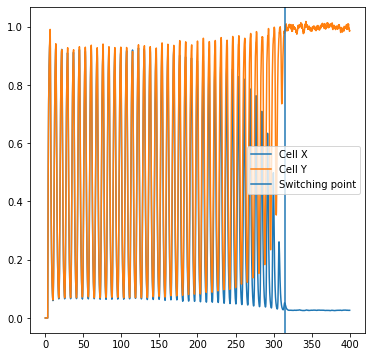

In [ ]:
results = example(tau=3,t0=0,t1=400,N=2000,mu=1,theta=0.3,n=3,b=0.004,sigma=0.01)
xs = results[0]
ys = results[1]
t = results[2]
dt = results[3]

# point = switching.point(xs,ys)
switch_info = switching.info(xs,ys,dt)
switching.plot(xs,ys,t,switch_info,switch_info[3])

# (RUN) Changing parameters for investigating time to switch

In [ ]:
# CHANGING TAU
taus = np.arange(0,3.5,0.5)
d={}
REPS = 50
j = [1,2,3]
for i in range(len(taus)):
  switching_times=[]
  for j in range(REPS):
    results = example(tau=taus[i],t0=0,t1=1000,N=2000,mu=1,theta=0.3,n=3,b=0.004,sigma=0.01)
    xs = results[0]
    ys = results[1]
    t = results[2]
    dt = results[3]

    switch_info = switching.info(xs,ys,dt)
    #switching.plot(xs,ys,t,switch_info,switch_info[3])
    switching_times.append(switch_info[3])
  print("tau=",taus[i],"times=",switching_times)
  d[str(taus[i])]=switching_times

Switching point: ( 0.03362969929407323 ,  0.990310202503598 )
Index of switching point:  20
Switching time:  10.0
Switching point: ( 0.9848201588827084 ,  0.030603020091099536 )
Index of switching point:  25
Switching time:  12.5
Switching point: ( 0.030507615368344898 ,  0.9964669496344926 )
Index of switching point:  27
Switching time:  13.5
Switching point: ( 0.9895232691788087 ,  0.03474824125295262 )
Index of switching point:  24
Switching time:  12.0
Switching point: ( 0.0323649775133252 ,  0.9922508457866692 )
Index of switching point:  21
Switching time:  10.5
Switching point: ( 0.9816497839211816 ,  0.030714944592033007 )
Index of switching point:  24
Switching time:  12.0
Switching point: ( 0.9889687396922475 ,  0.033374862254691835 )
Index of switching point:  22
Switching time:  11.0
Switching point: ( 0.9862598613760091 ,  0.032883672664493636 )
Index of switching point:  28
Switching time:  14.0
Switching point: ( 0.9820092253506245 ,  0.03111785818328146 )
Index of switc

Text(0, 0.5, 'Switching time')

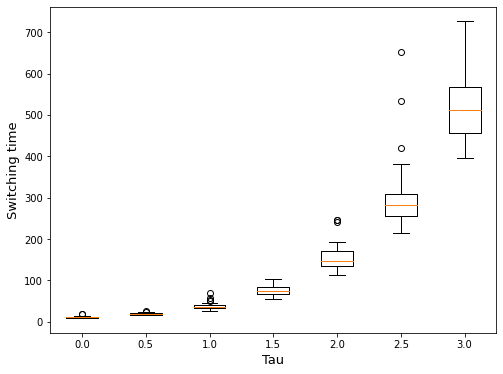

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)

ax.boxplot(d.values())
ax.set_xticklabels(d.keys())
plt.xlabel('Tau',fontsize=13)
plt.ylabel('Switching time',fontsize=13)

- compare to deterministic (odes with delays), add bias
- graph shows increase in time to switch and variance
- change x label to delay time, tau
- run for more reps

In [ ]:
# CHANGING BIAS
bs = np.arange(0,0.1,0.001)
d={}
REPS = 25
j = [1,2,3]
for i in range(len(bs)):
  switching_times=[]
  for j in range(REPS):
    results = example(tau=1,t0=0,t1=1000,N=2000,mu=1,theta=0.3,n=3,b=bs[i],sigma=0.01)
    xs = results[0]
    ys = results[1]
    t = results[2]
    dt = results[3]

    switch_info = switching.info(xs,ys,dt)
    #switching.plot(xs,ys,t,switch_info,switch_info[3])
    switching_times.append(switch_info[3])
  print("b=",bs[i],"times=",switching_times)
  name = round(bs[i],4)
  d[str(name)]=switching_times

Streaming output truncated to the last 5000 lines.
Index of switching point:  46
Switching time:  23.0
Switching point: ( 0.03333796207411433 ,  0.9862578285622821 )
Index of switching point:  47
Switching time:  23.5
Switching point: ( 0.02865806496740199 ,  0.9853666328386029 )
Index of switching point:  52
Switching time:  26.0
Switching point: ( 0.03942563962079973 ,  0.9937336534809723 )
Index of switching point:  50
Switching time:  25.0
Switching point: ( 0.03606617451592815 ,  0.9936723768289623 )
Index of switching point:  44
Switching time:  22.0
Switching point: ( 0.03229612020710548 ,  0.9918101344799966 )
Index of switching point:  48
Switching time:  24.0
Switching point: ( 0.03290230629926242 ,  0.9887904348315041 )
Index of switching point:  48
Switching time:  24.0
Switching point: ( 0.03520742976737538 ,  0.9871362914474353 )
Index of switching point:  49
Switching time:  24.5
Switching point: ( 0.03342524686207431 ,  1.0003771383032771 )
Index of switching point:  51

Text(0, 0.5, 'Switching time')

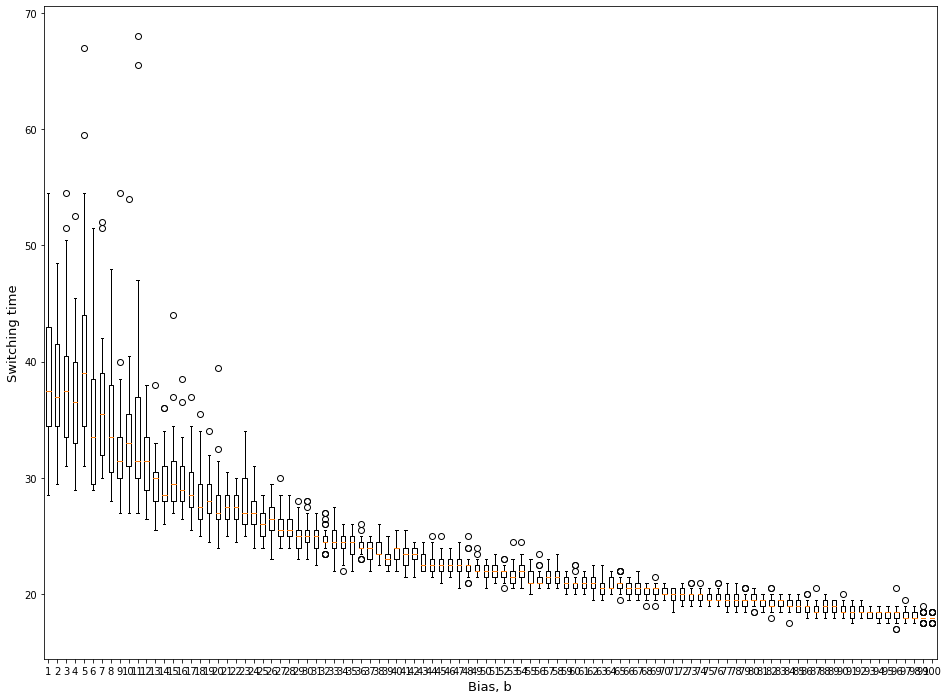

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(d.values())
fig.set_size_inches(16,12)
#ax.set_xticklabels(d.keys())
plt.xlabel('Bias, b',fontsize=13)
plt.ylabel('Switching time', fontsize=13)

- not a big effect
- compare to determinisitc

In [ ]:
# CHANGING BIAS
bs = np.arange(0,0.03,0.001)
d={}
REPS = 25
j = [1,2,3]
for i in range(len(bs)):
  switching_times=[]
  for j in range(REPS):
    results = example(tau=1,t0=0,t1=1000,N=2000,mu=1,theta=0.3,n=3,b=bs[i],sigma=0.01)
    xs = results[0]
    ys = results[1]
    t = results[2]
    dt = results[3]

    switch_info = switching.info(xs,ys,dt)
    #switching.plot(xs,ys,t,switch_info,switch_info[3])
    switching_times.append(switch_info[3])
  print("b=",bs[i],"times=",switching_times)
  name = round(bs[i],4)
  d[str(name)]=switching_times

Switching point: ( 0.03006343835630487 ,  0.9811612152698346 )
Index of switching point:  76
Switching time:  38.0
Switching point: ( 0.036793856028205264 ,  0.9926025819269991 )
Index of switching point:  66
Switching time:  33.0
Switching point: ( 0.9903242204281577 ,  0.03332062460234129 )
Index of switching point:  83
Switching time:  41.5
Switching point: ( 0.03302211707779438 ,  0.9856001826709758 )
Index of switching point:  95
Switching time:  47.5
Switching point: ( 0.9885659432250203 ,  0.035382245719009955 )
Index of switching point:  66
Switching time:  33.0
Switching point: ( 0.03322179868452436 ,  0.9869284467191026 )
Index of switching point:  69
Switching time:  34.5
Switching point: ( 0.9841883632801569 ,  0.03265089246952783 )
Index of switching point:  92
Switching time:  46.0
Switching point: ( 0.03306461242104878 ,  0.9899922788517362 )
Index of switching point:  108
Switching time:  54.0
Switching point: ( 0.9896496332795284 ,  0.03451390221831762 )
Index of switc

Text(0, 0.5, 'Switching time')

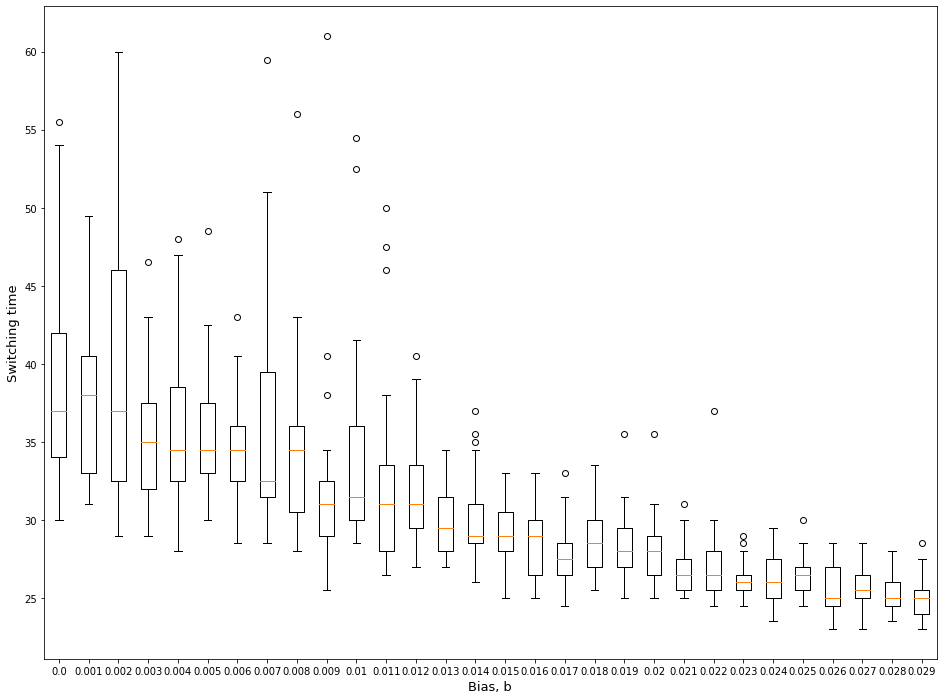

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(d.values())
fig.set_size_inches(16,12)
ax.set_xticklabels(d.keys())
plt.xlabel('Bias, b',fontsize=13)
plt.ylabel('Switching time', fontsize=13)

In [ ]:
# CHANGING SIGMA
sigmas = np.arange(0,0.1,0.005)
d={}
REPS = 50
j = [1,2,3]
for i in range(len(sigmas)):
  switching_times=[]
  for j in range(REPS):
    results = example(tau=1,t0=0,t1=200,N=1000,mu=1,theta=0.3,n=3,b=0.004,sigma=sigmas[i])
    xs = results[0]
    ys = results[1]
    t = results[2]
    dt = results[3]

    switch_info = switching.info(xs,ys,dt)
    #switching.plot(xs,ys,t,switch_info,switch_info[3])
    switching_times.append(switch_info[3])
  print("sigma=",sigmas[i],"times=",switching_times)
  name = round(sigmas[i],4)

  d[str(name)]=switching_times

Switching point: ( 0.03488622921288873 ,  0.9857412202782723 )
Index of switching point:  126
Switching time:  25.200000000000003
Switching point: ( 0.03488622921288873 ,  0.9857412202782723 )
Index of switching point:  126
Switching time:  25.200000000000003
Switching point: ( 0.03488622921288873 ,  0.9857412202782723 )
Index of switching point:  126
Switching time:  25.200000000000003
Switching point: ( 0.03488622921288873 ,  0.9857412202782723 )
Index of switching point:  126
Switching time:  25.200000000000003
Switching point: ( 0.03488622921288873 ,  0.9857412202782723 )
Index of switching point:  126
Switching time:  25.200000000000003
Switching point: ( 0.03488622921288873 ,  0.9857412202782723 )
Index of switching point:  126
Switching time:  25.200000000000003
Switching point: ( 0.03488622921288873 ,  0.9857412202782723 )
Index of switching point:  126
Switching time:  25.200000000000003
Switching point: ( 0.03488622921288873 ,  0.9857412202782723 )
Index of switching point:  

Text(0, 0.5, 'Switching time')

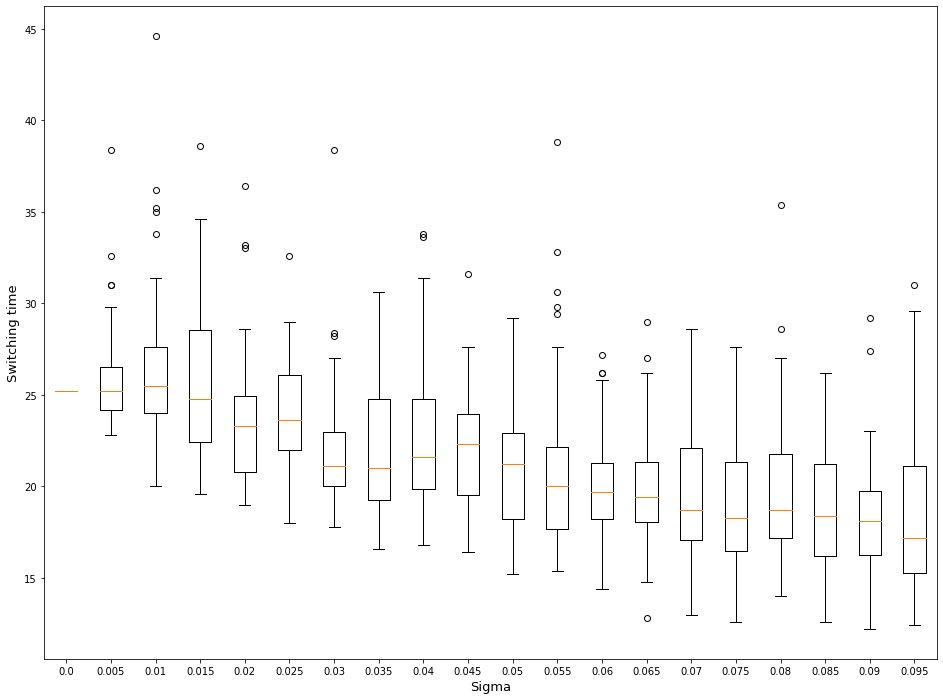

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(d.values())
fig.set_size_inches(16,12)

ax.set_xticklabels(d.keys())
plt.xlabel('Sigma',fontsize=13)
plt.ylabel('Switching time',fontsize=13)

- increasing sigma decreases time to switch
- no sig effects on variance

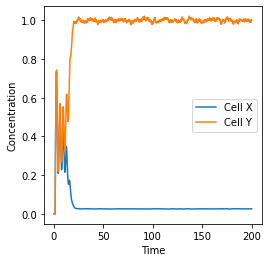

Switching point: ( 0.03851593979552935 ,  0.9952869046053557 )
Index of switching point:  100
Switching time:  20.0
900


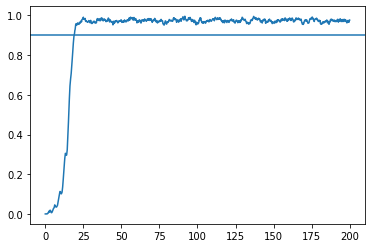

In [ ]:
# Changed difference to 0.95 as when change sigma, 0.95 is still good, 1 is too big. Some do not switch to a difference of 1
sigma=0.01
results = example(tau=1,t0=0,t1=200,N=1000,mu=1,theta=0.3,n=3,b=0.01,sigma=0.01)
xs = results[0]
ys = results[1]
t = results[2]
dt = results[3]

example_plot(xs,ys,t,dt)
switch_info = switching.info(xs,ys,dt)
#switching.plot(xs,ys,t,switch_info,switch_info[3])
#switching_times.append(switch_info[3])
count=0
for i in range(len(xs)):
  if (abs(xs[i]-ys[i])>=0.95):
    count+=1
print(count)

plt.plot(t,abs(ys-xs))
plt.axhline(y=0.9)

# (RUN) Changing parameters for end result of switch

In [ ]:
def cell_plot(cell_x,cell_y,parameter,parameter_range):
  barWidth = 0.25
  fig = plt.subplots(figsize =(12, 8))
  
  # Set position of bar on X axis
  br1 = np.arange(len(cell_x))
  br2 = [x + barWidth for x in br1]
  
  plt.bar(br1, cell_x, width = barWidth,
          edgecolor ='grey', label ='Cell X')
  plt.bar(br2, cell_y, width = barWidth,
          edgecolor ='grey', label ='Cell Y')

  # Adding Xticks
  plt.xlabel(parameter, fontweight ='bold', fontsize = 15)
  plt.ylabel('Number of times system switches to a cell', fontweight ='bold', fontsize = 15)
  plt.xticks([r + barWidth for r in range(len(cell_x))],parameter_range)

  plt.legend()
  plt.show()

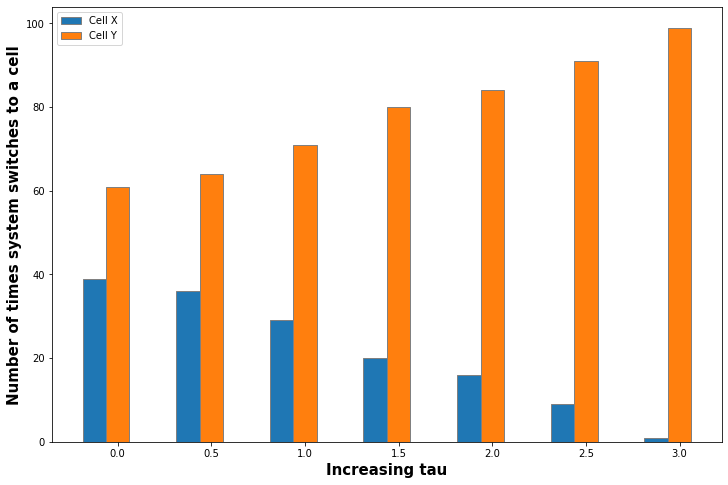

In [ ]:
# CHANGING TAU
taus = np.arange(0,3.5,0.5)
REPS = 100
cell_x=[]
cell_y=[]
cells={}
for i in range(len(taus)):
  cell_types=[]
  for j in range(REPS):
    results = example(tau=taus[i],t0=0,t1=1000,N=2000,mu=1,theta=0.3,n=3,b=0.006,sigma=0.02)
    xs = results[0]
    ys = results[1]
    typ = switching.switch_type(xs,ys)
    cell_types.append(typ)
  cells = {i:cell_types.count(i) for i in cell_types}
  cell_x.append(cells['X'])
  cell_y.append(cells['Y'])
cell_plot(cell_x,cell_y,'Increasing tau',taus)

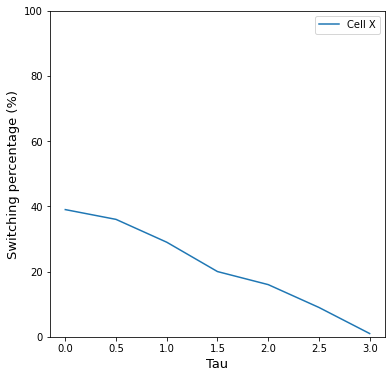

In [ ]:
percentages = []
perc_y=[]
fig = plt.figure()
fig.set_size_inches(6,6)

for i in range(len(cell_x)):
  percent_x = (cell_x[i]/(cell_x[i]+cell_y[i]))*100
  percent_y=(cell_y[i]/(cell_x[i]+cell_y[i]))*100
  percentages.append(percent_x)
  perc_y.append(percent_y)
plt.plot(taus,percentages,'-',label='Cell X')
#plt.plot(bs,perc_y,'-',label='Cell Y')


plt.ylim(0,100)
plt.xlabel('Tau',fontsize=13)
plt.ylabel('Switching percentage (%)',fontsize=13)
plt.legend()

- increasing tau more likely to stick in right basis

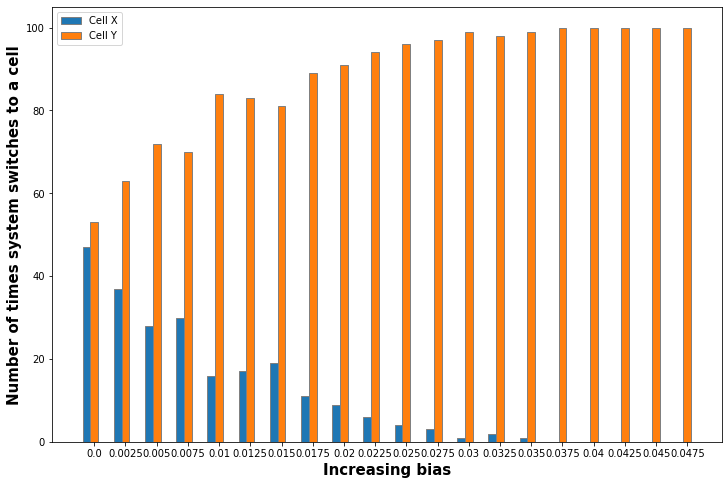

In [ ]:
# CHANGING BIAS
bs = np.arange(0,0.05,0.0025)
REPS = 100
cell_x=[]
cell_y=[]
cells={}
for i in range(len(bs)):
  cell_types=[]
  for j in range(REPS):
    results = example(tau=1,t0=0,t1=1000,N=2000,mu=1,theta=0.3,n=3,b=bs[i],sigma=0.025)
    xs = results[0]
    ys = results[1]
    typ = switching.switch_type(xs,ys)
    cell_types.append(typ)
  cells = {i:cell_types.count(i) for i in cell_types}
  if 'X' in cells:
    cell_x.append(cells['X'])
  else:
    cell_x.append(0)
  if 'Y' in cells:
    cell_y.append(cells['Y'])
  else:
    cell_y.append(0)
cell_plot(cell_x,cell_y,'Increasing bias',bs)

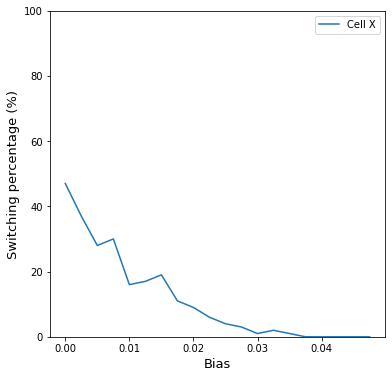

In [ ]:
percentages = []
perc_y=[]
fig = plt.figure()
fig.set_size_inches(6,6)

for i in range(len(cell_x)):
  percent_x = (cell_x[i]/(cell_x[i]+cell_y[i]))*100
  percent_y=(cell_y[i]/(cell_x[i]+cell_y[i]))*100
  percentages.append(percent_x)
  perc_y.append(percent_y)
plt.plot(bs,percentages,'-',label='Cell X')
#plt.plot(bs,perc_y,'-',label='Cell Y')


plt.ylim(0,100)
plt.xlabel('Bias',fontsize=13)
plt.ylabel('Switching percentage (%)',fontsize=13)
plt.legend()

- do % to switch graph instead
- do 1000 reps

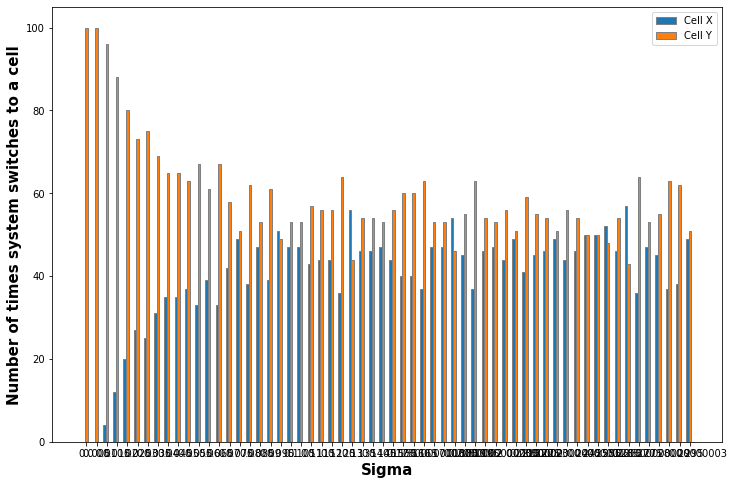

In [ ]:
sigmas = np.arange(0,0.3,0.005)
REPS = 100
cell_x=[]
cell_y=[]
cells={}
for i in range(len(sigmas)):
  cell_types=[]
  for j in range(REPS):
    results = example(tau=1,t0=0,t1=1000,N=2000,mu=1,theta=0.3,n=3,b=0.01,sigma=sigmas[i])
    xs = results[0]
    ys = results[1]
    typ = switching.switch_type(xs,ys)
    cell_types.append(typ)
  cells = {i:cell_types.count(i) for i in cell_types}
  if 'X' in cells:
    cell_x.append(cells['X'])
  else:
    cell_x.append(0)
  if 'Y' in cells:
    cell_y.append(cells['Y'])
  else:
    cell_y.append(0)
cell_plot(cell_x,cell_y,'Sigma',sigmas)

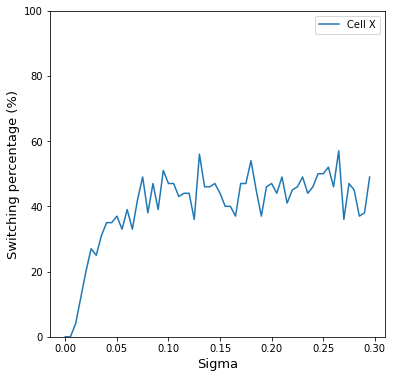

In [ ]:
percentages = []
perc_y=[]
fig = plt.figure()
fig.set_size_inches(6,6)

for i in range(len(cell_x)):
  percent_x = (cell_x[i]/(cell_x[i]+cell_y[i]))*100
  percent_y=(cell_y[i]/(cell_x[i]+cell_y[i]))*100
  percentages.append(percent_x)
  perc_y.append(percent_y)
plt.plot(sigmas,percentages,'-',label='Cell X')
#plt.plot(bs,perc_y,'-',label='Cell Y')


plt.ylim(0,100)
plt.xlabel('Sigma',fontsize=13)
plt.ylabel('Switching percentage (%)',fontsize=13)
plt.legend()

# (IGNORE) Notes

In [ ]:
times = []
xs=results[0]
ys=results[1]
for i in range(len(xs)):
  if abs(ys[i]-xs[i])>=1:
    #print("xs[i]=,",xs[i],"i=",i,'time',dt*i)
    rounded = round(dt*i/10)*10

    times.append(rounded)
result = dict((i, times.count(i)) for i in times)
print(result)

{}


* {120: 17, 130: 15, 140: 17, 150: 21, 160: 20, 170: 27, 180: 30, 190: 18, 200: 19}

* {130: 16, 140: 1, 150: 25, 160: 21, 170: 6, 180: 9, 190: 12, 200: 3}
* {80: 3, 90: 6, 100: 18, 110: 23, 120: 25, 130: 23, 140: 8, 150: 17, 160: 26, 170: 32, 180: 30, 190: 11, 200: 4}
* {110: 16, 120: 15, 130: 17, 140: 20, 150: 22, 160: 18, 170: 22, 180: 11, 190: 13, 200: 8}





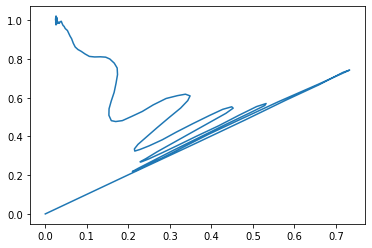

In [ ]:
plt.plot(xs,ys)